# Practical Big Data Assignment 2
Importing the required libraries for this assignment

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
import scipy.stats as stats

### Loading the dataset:

This dataset contains 8 assest classes of daily prices from Jan 1999 to August 12, 2018.

In [2]:
df = pd.read_excel("prices multiasset portfolio 12-9-2016 - Homework Data Set.xlsx")
df

,SPTR Index,Unnamed: 1,Unnamed: 2,FNERTR Index,Unnamed: 4,Unnamed: 5,RU10INTR Index,Unnamed: 7,Unnamed: 8,SPGSCITR Index,...,Unnamed: 13,Unnamed: 14,LBUSTRUU Index,Unnamed: 16,Unnamed: 17,LF98TRUU Index,Unnamed: 19,Unnamed: 20,GDLEEGF Index,Unnamed: 22
0,1999-01-04,1668.521,NaN,1999-01-04,2526.2561,NaN,1999-01-04,2522.621,NaN,1999-01-04,...,3312.732,NaN,1999-01-04,840.31,NaN,1999-01-04,536.88,NaN,1999-01-04,16353.000
1,1999-01-05,1691.253,NaN,1999-01-05,2535.7539,NaN,1999-01-05,2553.651,NaN,1999-01-05,...,3334.567,NaN,1999-01-05,838.85,NaN,1999-01-05,537.14,NaN,1999-01-05,16412.156
2,1999-01-06,1729.083,NaN,1999-01-06,2539.5659,NaN,1999-01-06,2608.138,NaN,1999-01-06,...,3383.917,NaN,1999-01-06,840.25,NaN,1999-01-06,537.63,NaN,1999-01-06,16785.383
3,1999-01-07,1725.640,NaN,1999-01-07,2522.4280,NaN,1999-01-07,2605.670,NaN,1999-01-07,...,3363.649,NaN,1999-01-07,838.69,NaN,1999-01-07,537.99,NaN,1999-01-07,17000.391
4,1999-01-08,1732.925,NaN,1999-01-08,2523.1851,NaN,1999-01-08,2616.827,NaN,1999-01-08,...,3343.808,NaN,1999-01-08,836.07,NaN,1999-01-08,538.79,NaN,1999-01-08,16941.010
5,1999-01-11,1717.690,NaN,1999-01-11,2515.2300,NaN,1999-01-11,2598.226,NaN,1999-01-11,...,3316.405,NaN,1999-01-11,835.25,NaN,1999-01-11,539.12,NaN,1999-01-11,16792.949
6,1999-01-12,1684.570,NaN,1999-01-12,2506.2949,NaN,1999-01-12,2549.888,NaN,1999-01-12,...,3269.469,NaN,1999-01-12,837.53,NaN,1999-01-12,539.60,NaN,1999-01-12,16458.416
7,1999-01-13,1677.729,NaN,1999-01-13,2500.4990,NaN,1999-01-13,2537.667,NaN,1999-01-13,...,3191.059,NaN,1999-01-13,840.25,NaN,1999-01-13,539.36,NaN,1999-01-13,15844.567
8,1999-01-14,1647.566,NaN,1999-01-14,2485.9609,NaN,1999-01-14,2493.123,NaN,1999-01-14,...,3205.420,NaN,1999-01-14,843.88,NaN,1999-01-14,539.48,NaN,1999-01-14,15651.924
9,1999-01-15,1689.818,NaN,1999-01-15,2493.1050,NaN,1999-01-15,2552.897,NaN,1999-01-15,...,3220.312,NaN,1999-01-15,842.01,NaN,1999-01-15,539.30,NaN,1999-01-15,16243.029


### Transforming and cleaning data
The dataset contains some in between blank columns and also the column names need modification for better understanding. Hence, we have deleted the blank columns and also modified column names for better understanding.

In [3]:
df.drop(['Unnamed: 2','Unnamed: 5','Unnamed: 8','Unnamed: 11',
         'Unnamed: 14','Unnamed: 17','Unnamed: 20'], axis=1, inplace=True)

In [4]:
new_column_names = {'SPTR Index': 'SPTR_Date', 'Unnamed: 1': 'SPTR_Price',
                    'FNERTR Index':'FNERTR_Date','Unnamed: 4':'FNERTR_Price', 
                    'RU10INTR Index': 'RU10INTR_Date', 'Unnamed: 7':'RU10INTR_Price',
                    'SPGSCITR Index':'SPGSCITR_Date', 'Unnamed: 10':'SPGSCITR_Price', 
                    'GDDUEAFE Index':'GDDUEAFE_Date', 'Unnamed: 13': 'GDDUEAFE_Price', 
                    'LBUSTRUU Index':'LBUSTRUU_Date','Unnamed: 16':'LBUSTRUU_Price',
                    'LF98TRUU Index':'LF98TRUU_Date','Unnamed: 19':'LF98TRUU_Price', 
                    'GDLEEGF Index':'GDLEEGF_Date','Unnamed: 22':'GDLEEGF_Price'}
df.rename(columns=new_column_names, inplace=True)

## SPTR Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [5]:
Linear_Returns_SPTR = []
Compounded_Returns_SPTR = []
for i in range(len(df)-1):
    Linear_Returns_SPTR.append((df.loc[i+1,'SPTR_Price']/df.loc[i,'SPTR_Price'])-1)
    Compounded_Returns_SPTR.append(np.log(df.loc[i+1,'SPTR_Price']/df.loc[i,'SPTR_Price']))

In [6]:
Linear_Returns_SPTR

[0.013624041890992089,
 0.022368031276219558,
 -0.001991228876809248,
 0.004221622122806634,
 -0.008791494150064194,
 -0.019281709738078523,
 -0.0040609769852246735,
 -0.0179784697051788,
 0.025645103140025993,
 0.007038036048852669,
 0.0037468171740089318,
 -0.017072900853410844,
 -0.008063493008919398,
 0.007178511661253495,
 0.014858627519015233,
 -0.00716045974040469,
 0.01796428089624369,
 0.011277367320047249,
 -0.005188985877428887,
 -0.008608103368883069,
 0.008117549151704706,
 -0.018459500034974208,
 -0.007259517441747465,
 0.0036865583005998293,
 -0.02220124518485367,
 0.006288699865859559,
 0.024998798539023426,
 -0.019037024968146632,
 0.00954909031815565,
 -0.014248811218194324,
 0.010902467343628208,
 0.0015708161949070654,
 0.02658787547814012,
 -0.0007381638203847185,
 -0.013882297859304282,
 -0.006562612102497645,
 -0.005348612723857005,
 -0.0017244376002141237,
 -0.008608559238439284,
 0.0020193326072766027,
 0.015563406315089345,
 0.02314343605692204,
 0.00575112316

In [7]:
Compounded_Returns_SPTR

[0.013532069051891775,
 0.02212153583871263,
 -0.001993214008701544,
 0.004212736076374421,
 -0.00883036733806785,
 -0.019470026546781795,
 -0.0040692451443896955,
 -0.018142045924209458,
 0.025321783537912694,
 0.007013384670415953,
 0.003739815338822077,
 -0.01722032318569938,
 -0.008096178794988744,
 0.007152868791711931,
 0.014749319560443137,
 -0.00718621887071726,
 0.017804829984501433,
 0.011214251887212022,
 -0.005202495418791092,
 -0.008645367091447628,
 0.008084779071963125,
 -0.018632002780173584,
 -0.0072859959638453195,
 0.003679779599491047,
 -0.02245140229396998,
 0.006269008505110618,
 0.024691440432634208,
 -0.019220562196451477,
 0.009503785937276963,
 -0.014351300258294623,
 0.010843463914463187,
 0.0015695837536050087,
 0.02624056070820176,
 -0.0007384363974435176,
 -0.013979558136089582,
 -0.006584240720051607,
 -0.005362967762132129,
 -0.0017259261542578244,
 -0.008645826919354812,
 0.0020172964957839872,
 0.015443538607158615,
 0.02287968834015522,
 0.00573464859

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [8]:
print("The Mean SPTR Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['SPTR_Price'])))
print("The Mean of Daily Linear Returns of SPTR is "+ str(np.mean(Linear_Returns_SPTR)))
print("The Mean of Daily Compunded Returns  of SPTR is " + str(np.mean(Compounded_Returns_SPTR)))

The Mean SPTR Price from Jan 1999 to 8/12/2016 is 2223.599976975868
The Mean of Daily Linear Returns of SPTR is 0.0002859129959505457
The Mean of Daily Compunded Returns  of SPTR is 0.0002090139663242718


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [9]:
print("The Standard Deviation in SPTR Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['SPTR_Price'])))
print("The Standard Deviation in Linear Returns of SPTR is "+ str(np.std(Linear_Returns_SPTR)))
print("The Standard Deviation in Daily Compunded Returns  of SPTR is " + str(np.std(Compounded_Returns_SPTR)))

The Standard Deviation in SPTR Price from Jan 1999 to 8/12/2016 is 777.7201062711225
The Standard Deviation in Linear Returns of SPTR is 0.012396662283212127
The Standard Deviation in Daily Compunded Returns  of SPTR is 0.012402283900660093


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [10]:
print("The Skewness in SPTR Price from Jan 1999 to 8/12/2016 is " + str(skew(df['SPTR_Price'])))
print("The Skewness in Daily Linear Returns of SPTR is "+ str(skew(Linear_Returns_SPTR)))
print("The Skewness Deviation in Daily Compunded Returns  of SPTR is " + str(skew(Compounded_Returns_SPTR)))

The Skewness in SPTR Price from Jan 1999 to 8/12/2016 is 1.0994305831519429
The Skewness in Daily Linear Returns of SPTR is 0.001376746532534205
The Skewness Deviation in Daily Compunded Returns  of SPTR is -0.18204570839631273


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [11]:
print("The Kurtosis of SPTR Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['SPTR_Price'])))
print("The Kurtosis of Daily Linear Returns of SPTR is "+ str(kurtosis(Linear_Returns_SPTR)))
print("The Kurtosis of Daily Compunded Returns  of SPTR is " + str(kurtosis(Compounded_Returns_SPTR)))

The Kurtosis of SPTR Price from Jan 1999 to 8/12/2016 is 0.1011567311962418
The Kurtosis of Daily Linear Returns of SPTR is 7.989153699888487
The Kurtosis of Daily Compunded Returns  of SPTR is 7.827546201758745


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


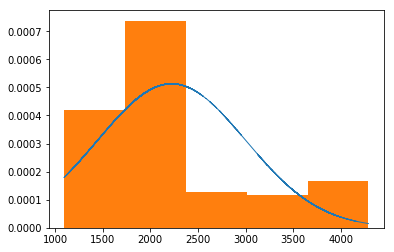

In [12]:
fit = stats.norm.pdf(df['SPTR_Price'], np.mean(df['SPTR_Price']), np.std(df['SPTR_Price']))
plt.plot(df['SPTR_Price'],fit,'-',linewidth = 1)
plt.hist(df['SPTR_Price'],normed=True,bins = 5)      
plt.show()

The distribution of SPTR Price is Right Skewed and has Thinner tail Kurtosis which is lack of outliers.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [13]:
print("The Jarque Bera of SPTR Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['SPTR_Price'])))
print("The Jarque Bera of Daily Linear Returns of SPTR is "+ str(jarque_bera(Linear_Returns_SPTR)))
print("The Jarque Bera of Daily Compunded Returns  of SPTR is " + str(jarque_bera(Compounded_Returns_SPTR)))

The Jarque Bera of SPTR Price from Jan 1999 to 8/12/2016 is (911.9113667156361, 0.0)
The Jarque Bera of Daily Linear Returns of SPTR is (12010.03563543756, 0.0)
The Jarque Bera of Daily Compunded Returns  of SPTR is (11554.005755234633, 0.0)


## FNERTR Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [14]:
Linear_Returns_FNERTR = []
Compounded_Returns_FNERTR = []
for i in range(len(df)-1):
    Linear_Returns_FNERTR.append((df.loc[i+1,'FNERTR_Price']/df.loc[i,'FNERTR_Price'])-1)
    Compounded_Returns_FNERTR.append(np.log(df.loc[i+1,'FNERTR_Price']/df.loc[i,'FNERTR_Price']))

In [15]:
Linear_Returns_FNERTR

[0.0037596346625348165,
 0.0015033004582976073,
 -0.006748358055996939,
 0.0003001473183774639,
 -0.0031528007992754903,
 -0.0035523987865921924,
 -0.0023125371240232395,
 -0.005814079509729786,
 0.002873778103267721,
 0.0043560539969234036,
 -0.0032752852665558496,
 -0.002483007306901097,
 -0.0016046566171810106,
 0.001514701646140093,
 -0.0026753710998297375,
 -0.005457455802748479,
 -0.007663758527859055,
 -0.00438012311704028,
 0.0015680436540204123,
 0.003655264169361905,
 0.00019782002414969746,
 0.000716675457608229,
 -0.0052992254667898475,
 -0.0014389720336366318,
 -0.00102996289631474,
 -0.010614012436105491,
 -0.004979309560032896,
 -0.009580441718006316,
 -0.00031036505584258745,
 -0.0036952069307455426,
 0.004343131028779146,
 -0.0006866673458545414,
 0.010221442828827865,
 0.0005399875839136037,
 -0.0012086376391908793,
 -0.0028071537415648162,
 -0.003143090765899803,
 0.003722648420036334,
 -0.0026967310918291076,
 -0.0012308589089550237,
 -0.000541555072577804,
 0.00449

In [16]:
Compounded_Returns_FNERTR

[0.0037525849002990356,
 0.0015021716333307638,
 -0.006771231186350539,
 0.000300102283182336,
 -0.0031577813469202223,
 -0.003558723538297818,
 -0.0023152151675115236,
 -0.0058310470691259305,
 0.002869656697090807,
 0.004346593856350547,
 -0.0032806607540570984,
 -0.002486095081915129,
 -0.001605945457559231,
 0.0015135556426912693,
 -0.002678956301014072,
 -0.005472402118710402,
 -0.007693276031971554,
 -0.004389743960230765,
 0.0015668155572086152,
 0.0036485999260640733,
 0.00019780046034875202,
 0.0007164187683870483,
 -0.005313316163963221,
 -0.0014400083481644797,
 -0.0010304936725831727,
 -0.010670742848052186,
 -0.00499174762771783,
 -0.009626629385328109,
 -0.0003104132290443083,
 -0.003702051073427169,
 0.004333726854421365,
 -0.0006869032098560588,
 0.01016955714690019,
 0.0005398418430813463,
 -0.0012093686307242638,
 -0.0028111011867502753,
 -0.003148040650359801,
 0.00371573651282946,
 -0.0027003738215688146,
 -0.0012316170379456338,
 -0.0005417017664904006,
 0.00448122

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [17]:
print("The Mean FNERTR Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['FNERTR_Price'])))
print("The Mean of Daily Linear Returns of FNERTR is "+ str(np.mean(Linear_Returns_FNERTR)))
print("The Mean of Daily Compunded Returns  of FNERTR is " + str(np.mean(Compounded_Returns_FNERTR)))

The Mean FNERTR Price from Jan 1999 to 8/12/2016 is 7675.083055877779
The Mean of Daily Linear Returns of FNERTR is 0.0005720659601851946
The Mean of Daily Compunded Returns  of FNERTR is 0.00040531689978906587


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [18]:
print("The Standard Deviation in FNERTR Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['FNERTR_Price'])))
print("The Standard Deviation in Linear Returns of FNERTR is "+ str(np.std(Linear_Returns_FNERTR)))
print("The Standard Deviation in Daily Compunded Returns  of FNERTR is " + str(np.std(Compounded_Returns_FNERTR)))

The Standard Deviation in FNERTR Price from Jan 1999 to 8/12/2016 is 3935.955726777786
The Standard Deviation in Linear Returns of FNERTR is 0.01827396257967819
The Standard Deviation in Daily Compunded Returns  of FNERTR is 0.01825884358495225


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [19]:
print("The Skewness in FNERTR Price from Jan 1999 to 8/12/2016 is " + str(skew(df['FNERTR_Price'])))
print("The Skewness in Daily Linear Returns of FNERTR is "+ str(skew(Linear_Returns_FNERTR)))
print("The Skewness Deviation in Daily Compunded Returns  of FNERTR is " + str(skew(Compounded_Returns_FNERTR)))

The Skewness in FNERTR Price from Jan 1999 to 8/12/2016 is 0.43882140494412886
The Skewness in Daily Linear Returns of FNERTR is 0.4155066960543095
The Skewness Deviation in Daily Compunded Returns  of FNERTR is -0.19957413580005734


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [20]:
print("The Kurtosis of FNERTR Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['FNERTR_Price'])))
print("The Kurtosis of Daily Linear Returns of FNERTR is "+ str(kurtosis(Linear_Returns_FNERTR)))
print("The Kurtosis of Daily Compunded Returns  of FNERTR is " + str(kurtosis(Compounded_Returns_FNERTR)))

The Kurtosis of FNERTR Price from Jan 1999 to 8/12/2016 is -0.8044091270122866
The Kurtosis of Daily Linear Returns of FNERTR is 20.633241772475316
The Kurtosis of Daily Compunded Returns  of FNERTR is 20.656414018681406


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


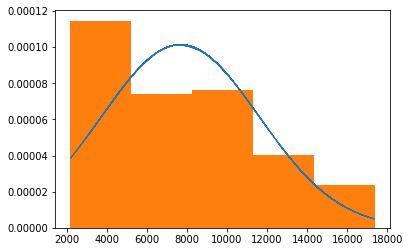

In [21]:
fit = stats.norm.pdf(df['FNERTR_Price'], np.mean(df['FNERTR_Price']), np.std(df['FNERTR_Price']))
plt.plot(df['FNERTR_Price'],fit,'-',linewidth = 1)
plt.hist(df['FNERTR_Price'],normed=True,bins = 5)      
plt.show()

The distribution of FNERTR Price is Right Skewed and has fatter tail Kurtosis which is excess of ouliers.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [22]:
print("The Jarque Bera of FNERTR Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['FNERTR_Price'])))
print("The Jarque Bera of Daily Linear Returns of FNERTR is "+ str(jarque_bera(Linear_Returns_FNERTR)))
print("The Jarque Bera of Daily Compunded Returns  of FNERTR is " + str(jarque_bera(Compounded_Returns_FNERTR)))

The Jarque Bera of FNERTR Price from Jan 1999 to 8/12/2016 is (266.7534950096997, 0.0)
The Jarque Bera of Daily Linear Returns of FNERTR is (80238.26507648197, 0.0)
The Jarque Bera of Daily Compunded Returns  of FNERTR is (80318.33190390868, 0.0)


## RU10INTR Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [23]:
Linear_Returns_RU10INTR = []
Compounded_Returns_RU10INTR = []
for i in range(len(df)-1):
    Linear_Returns_RU10INTR.append((df.loc[i+1,'RU10INTR_Price']/df.loc[i,'RU10INTR_Price'])-1)
    Compounded_Returns_RU10INTR.append(np.log(df.loc[i+1,'RU10INTR_Price']/df.loc[i,'FNERTR_Price']))

In [24]:
Linear_Returns_RU10INTR

[0.012300698360950602,
 0.021336901557808874,
 -0.0009462689474252217,
 0.004281816193148158,
 -0.007108226871703871,
 -0.018604232272327437,
 -0.004792759525124257,
 -0.01755313049348073,
 0.023975551948299367,
 0.007417455541684603,
 0.0028190010782194186,
 -0.01777104497994053,
 -0.007672357643343619,
 0.006883166375873717,
 0.014316209009697989,
 -0.007764417281145297,
 0.017055694410695876,
 0.010289605757454856,
 -0.00449966877119834,
 -0.008452083624356566,
 0.008880979547351009,
 -0.018595372640188512,
 -0.008468070102470526,
 0.0030454931629173565,
 -0.021843286456572963,
 0.004949200079560123,
 0.024913214783514714,
 -0.01850263916576611,
 0.008394670338274901,
 -0.01327511763885092,
 0.010589524404162054,
 0.002247184793298551,
 0.025648023657502517,
 8.498208839058385e-05,
 -0.013114582648439677,
 -0.007623523324661874,
 -0.004962125465334255,
 -0.0006139386968796456,
 -0.007039759579833049,
 0.0005347767933112646,
 0.014563189746675143,
 0.02179032220159338,
 0.00602754177

In [25]:
Compounded_Returns_RU10INTR

[0.010785695499436683,
 0.028145567495641403,
 0.025696678919786824,
 0.03674058540811749,
 0.029306872447844894,
 0.013685185974592503,
 0.012439627885982858,
 -0.002954170485579745,
 0.026569527865359818,
 0.031089952667085835,
 0.029558393956977836,
 0.01490820865930596,
 0.00969236214572063,
 0.018157893134883578,
 0.03085903725302799,
 0.025743276241744408,
 0.04812755735976165,
 0.06605786151702821,
 0.06593778272538643,
 0.05588296213464555,
 0.061076137799124415,
 0.042107897061251905,
 0.03288735038042327,
 0.04124153158722551,
 0.020596156948165904,
 0.02656364366971882,
 0.06184232701967437,
 0.04815812046754328,
 0.06614438090503717,
 0.05309077445442443,
 0.0673266736305841,
 0.06523761042599065,
 0.09124914466292465,
 0.08116456599364204,
 0.06742338602033487,
 0.06098002373459434,
 0.05881664723231255,
 0.061350560648260014,
 0.050570168538004695,
 0.05380517621073455,
 0.06949495818378751,
 0.09159296649643195,
 0.09312119461292472,
 0.09324889416343458,
 0.096446014165

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [26]:
print("The Mean RU10INTR Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['RU10INTR_Price'])))
print("The Mean of Daily Linear Returns of RU10INTR is "+ str(np.mean(Linear_Returns_RU10INTR)))
print("The Mean of Daily Compunded Returns  of RU10INTR is " + str(np.mean(Compounded_Returns_RU10INTR)))

The Mean RU10INTR Price from Jan 1999 to 8/12/2016 is 3498.2076003984944
The Mean of Daily Linear Returns of RU10INTR is 0.00029844221300037445
The Mean of Daily Compunded Returns  of RU10INTR is -0.6955076857235857


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [27]:
print("The Standard Deviation in RU10INTR Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['RU10INTR_Price'])))
print("The Standard Deviation in Linear Returns of RU10INTR is "+ str(np.std(Linear_Returns_RU10INTR)))
print("The Standard Deviation in Daily Compunded Returns  of RU10INTR is " + str(np.std(Compounded_Returns_RU10INTR)))

The Standard Deviation in RU10INTR Price from Jan 1999 to 8/12/2016 is 1271.1992404204675
The Standard Deviation in Linear Returns of RU10INTR is 0.012471438478384465
The Standard Deviation in Daily Compunded Returns  of RU10INTR is 0.34838765492426416


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [28]:
print("The Skewness in RU10INTR Price from Jan 1999 to 8/12/2016 is " + str(skew(df['RU10INTR_Price'])))
print("The Skewness in Daily Linear Returns of RU10INTR is "+ str(skew(Linear_Returns_RU10INTR)))
print("The Skewness Deviation in Daily Compunded Returns  of RU10INTR is " + str(skew(Compounded_Returns_RU10INTR)))

The Skewness in RU10INTR Price from Jan 1999 to 8/12/2016 is 1.0779563144542217
The Skewness in Daily Linear Returns of RU10INTR is -0.020916821309970166
The Skewness Deviation in Daily Compunded Returns  of RU10INTR is 1.435262922224826


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [29]:
print("The Kurtosis of RU10INTR Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['RU10INTR_Price'])))
print("The Kurtosis of Daily Linear Returns of RU10INTR is "+ str(kurtosis(Linear_Returns_RU10INTR)))
print("The Kurtosis of Daily Compunded Returns  of RU10INTR is " + str(kurtosis(Compounded_Returns_RU10INTR)))

The Kurtosis of RU10INTR Price from Jan 1999 to 8/12/2016 is 0.026237800029468072
The Kurtosis of Daily Linear Returns of RU10INTR is 7.83438094536632
The Kurtosis of Daily Compunded Returns  of RU10INTR is 0.8854429604292582


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


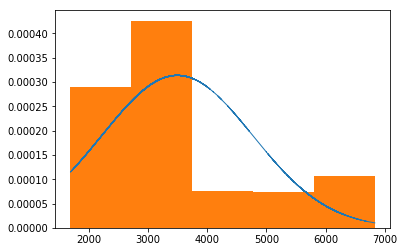

In [30]:
fit = stats.norm.pdf(df['RU10INTR_Price'], np.mean(df['RU10INTR_Price']), np.std(df['RU10INTR_Price']))
plt.plot(df['RU10INTR_Price'],fit,'-',linewidth = 1)
plt.hist(df['RU10INTR_Price'],normed=True,bins = 5)      
plt.show()

The distribution of RU10INTR Price is Right Skewed and has normal distribution kurtosis.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [31]:
print("The Jarque Bera of RU10INTR Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['RU10INTR_Price'])))
print("The Jarque Bera of Daily Linear Returns of RU10INTR is "+ str(jarque_bera(Linear_Returns_RU10INTR)))
print("The Jarque Bera of Daily Compunded Returns  of RU10INTR is " + str(jarque_bera(Compounded_Returns_RU10INTR)))

The Jarque Bera of RU10INTR Price from Jan 1999 to 8/12/2016 is (874.9142331676537, 0.0)
The Jarque Bera of Daily Linear Returns of RU10INTR is (11549.533551087256, 0.0)
The Jarque Bera of Daily Compunded Returns  of RU10INTR is (1698.002425624136, 0.0)


## SPGSCITR Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [32]:
Linear_Returns_SPGSCITR = []
Compounded_Returns_SPGSCITR = []
for i in range(len(df)-1):
    Linear_Returns_SPGSCITR.append((df.loc[i+1,'SPGSCITR_Price']/df.loc[i,'SPGSCITR_Price'])-1)
    Compounded_Returns_SPGSCITR.append(np.log(df.loc[i+1,'SPGSCITR_Price']/df.loc[i,'SPGSCITR_Price']))

In [33]:
Linear_Returns_SPGSCITR

[-0.008623091112142878,
 0.02979072422531015,
 0.0020958846324408142,
 0.0037610713901981008,
 0.01047892996532096,
 -0.016523101510433125,
 -0.024882956375702037,
 -0.005064554023170631,
 -0.0022660884676881654,
 -0.010611292561526597,
 -0.008365362097937257,
 0.016689515028311286,
 0.004660328197866104,
 -0.012964041515313718,
 -0.009491890225892141,
 0.0077459478866528375,
 0.009058333672124608,
 0.0068559276004254155,
 -0.012799433500082058,
 0.003263280551309755,
 0.0002500870701915847,
 -0.005865555310132664,
 -0.0038286076157305615,
 -0.0025778412012648078,
 -0.005425749482762754,
 -0.002343062437773713,
 -0.0021785003508241196,
 -0.0016531267465137445,
 -0.021084774271998397,
 0.0023468502348988896,
 0.01483208900459565,
 -0.005942123655641174,
 -0.001245375472240129,
 0.01457915637933116,
 -0.0027995228682868856,
 0.004207853403141337,
 -0.018117481571002014,
 0.002626790287407088,
 0.0116754597152684,
 0.0117260820403291,
 0.015790973374227857,
 0.004660250947560618,
 0.01295

In [34]:
Compounded_Returns_SPGSCITR

[-0.008660485085253439,
 0.029355601233841396,
 0.0020936913303153852,
 0.003754016245598691,
 0.010424406546002999,
 -0.016661130509153427,
 -0.025197770446213723,
 -0.005077422343486563,
 -0.0022686599316709363,
 -0.010667993798768542,
 -0.00840054810599177,
 0.01655177549701751,
 0.004649502489615959,
 -0.013048808110275934,
 -0.009537225321160482,
 0.007716102056076978,
 0.009017553052301475,
 0.006832532597555451,
 -0.012882051986042654,
 0.003257967606613138,
 0.0002500558036330456,
 -0.005882825244631078,
 -0.003835955494627547,
 -0.0025811695551031734,
 -0.005440522321533423,
 -0.002345811703875022,
 -0.0021808767346426627,
 -0.0016544946683070328,
 -0.0213102329200921,
 0.0023441006829039305,
 0.014723169256650497,
 -0.005959848322063079,
 -0.0012461515967180684,
 0.014473902256529697,
 -0.0028034488614155748,
 0.004199025144690441,
 -0.01828361278552909,
 0.0026233463035639335,
 0.011607827451644072,
 0.011657864306936118,
 0.0156675931220831,
 0.004649425597649303,
 0.012874

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [35]:
print("The Mean SPGSCITR Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['SPGSCITR_Price'])))
print("The Mean of Daily Linear Returns of SPGSCITR is "+ str(np.mean(Linear_Returns_SPGSCITR)))
print("The Mean of Daily Compunded Returns  of SPGSCITR is " + str(np.mean(Compounded_Returns_SPGSCITR)))

The Mean SPGSCITR Price from Jan 1999 to 8/12/2016 is 4557.7009985388595
The Mean of Daily Linear Returns of SPGSCITR is 0.0001478428078447472
The Mean of Daily Compunded Returns  of SPGSCITR is 3.750394045902907e-05


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [36]:
print("The Standard Deviation in SPGSCITR Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['SPGSCITR_Price'])))
print("The Standard Deviation in Linear Returns of SPGSCITR is "+ str(np.std(Linear_Returns_SPGSCITR)))
print("The Standard Deviation in Daily Compunded Returns  of SPGSCITR is " + str(np.std(Compounded_Returns_SPGSCITR)))

The Standard Deviation in SPGSCITR Price from Jan 1999 to 8/12/2016 is 1576.114088193933
The Standard Deviation in Linear Returns of SPGSCITR is 0.01484199167996133
The Standard Deviation in Daily Compunded Returns  of SPGSCITR is 0.014862899654341732


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [37]:
print("The Skewness in SPGSCITR Price from Jan 1999 to 8/12/2016 is " + str(skew(df['SPGSCITR_Price'])))
print("The Skewness in Daily Linear Returns of SPGSCITR is "+ str(skew(Linear_Returns_SPGSCITR)))
print("The Skewness Deviation in Daily Compunded Returns  of SPGSCITR is " + str(skew(Compounded_Returns_SPGSCITR)))

The Skewness in SPGSCITR Price from Jan 1999 to 8/12/2016 is 0.7739365958065292
The Skewness in Daily Linear Returns of SPGSCITR is -0.1402417144067741
The Skewness Deviation in Daily Compunded Returns  of SPGSCITR is -0.23738984795374246


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [38]:
print("The Kurtosis of SPGSCITR Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['SPGSCITR_Price'])))
print("The Kurtosis of Daily Linear Returns of SPGSCITR is "+ str(kurtosis(Linear_Returns_SPGSCITR)))
print("The Kurtosis of Daily Compunded Returns  of SPGSCITR is " + str(kurtosis(Compounded_Returns_SPGSCITR)))

The Kurtosis of SPGSCITR Price from Jan 1999 to 8/12/2016 is 1.034887676934101
The Kurtosis of Daily Linear Returns of SPGSCITR is 2.3415191494422247
The Kurtosis of Daily Compunded Returns  of SPGSCITR is 2.444718225532932


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


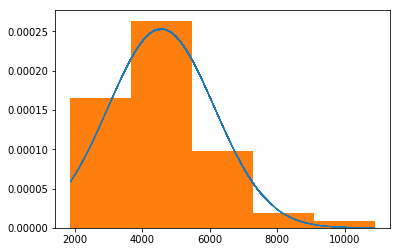

In [39]:
fit = stats.norm.pdf(df['SPGSCITR_Price'], np.mean(df['SPGSCITR_Price']), np.std(df['SPGSCITR_Price']))
plt.plot(df['SPGSCITR_Price'],fit,'-',linewidth = 1)
plt.hist(df['SPGSCITR_Price'],normed=True,bins = 5)      
plt.show()

The distribution of SPGSCITR Price is Right Skewed and has fatter tail Kurtosis which is excess of outliers.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [40]:
print("The Jarque Bera of SPGSCITR Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['SPGSCITR_Price'])))
print("The Jarque Bera of Daily Linear Returns of SPGSCITR is "+ str(jarque_bera(Linear_Returns_SPGSCITR)))
print("The Jarque Bera of Daily Compunded Returns  of SPGSCITR is " + str(jarque_bera(Compounded_Returns_SPGSCITR)))

The Jarque Bera of SPGSCITR Price from Jan 1999 to 8/12/2016 is (652.5002088329244, 0.0)
The Jarque Bera of Daily Linear Returns of SPGSCITR is (1046.4668787830458, 0.0)
The Jarque Bera of Daily Compunded Returns  of SPGSCITR is (1167.021513997308, 0.0)


## GDDUEAFE Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [41]:
Linear_Returns_GDDUEAFE = []
Compounded_Returns_GDDUEAFE = []
for i in range(len(df)-1):
    Linear_Returns_GDDUEAFE.append((df.loc[i+1,'GDDUEAFE_Price']/df.loc[i,'GDDUEAFE_Price'])-1)
    Compounded_Returns_GDDUEAFE.append(np.log(df.loc[i+1,'GDDUEAFE_Price']/df.loc[i,'GDDUEAFE_Price']))

In [42]:
Linear_Returns_GDDUEAFE

[0.006591236477928142,
 0.01479952269664997,
 -0.00598950860792391,
 -0.005898653515869157,
 -0.008195147568281325,
 -0.01415267435672063,
 -0.023982487676133313,
 0.004500386862167138,
 0.004645881038990218,
 0.01622948335440788,
 0.008508587730277295,
 -0.0044621580095387525,
 -0.023588623894982397,
 0.0011545454460444304,
 0.0034991825692822776,
 -0.0017393020205191956,
 -2.797180193692128e-06,
 0.005300360495375855,
 0.0077660994301871344,
 0.0020551027689434953,
 -0.011663640900198669,
 -0.003933039514393388,
 -0.006518233794989614,
 -0.007809342851374357,
 -0.014408678207027958,
 -0.005769176598327319,
 0.00984290692219858,
 0.007723098357598213,
 -0.0032684877098725362,
 -0.005496978534549668,
 -0.001160497137057348,
 -0.005491605059459781,
 0.008583634448664945,
 0.006381264548668275,
 0.005181914643071606,
 -0.002599959564582477,
 -0.002824912272060387,
 -0.016910415989204175,
 -0.0020777345189292307,
 -0.006029293438846839,
 -0.0011945999794784612,
 0.027714447240632545,
 -0.

In [43]:
Compounded_Returns_GDDUEAFE

[0.006569609260162341,
 0.014691078400594922,
 -0.006007517660865205,
 -0.005916119289418398,
 -0.00822891238843817,
 -0.014253778515559977,
 -0.024274749775236013,
 0.004490290401864141,
 0.004635122243529304,
 0.01609919309494269,
 0.008472593725677987,
 -0.004472143151181146,
 -0.02387128946092912,
 0.001153879471000621,
 0.003493074674235198,
 -0.0017408163624652354,
 -2.7971841058079414e-06,
 0.005286363023996352,
 0.0077360985066680776,
 0.0020529939340021204,
 -0.011732194739328497,
 -0.003940794254114375,
 -0.006539570248760633,
 -0.007839995458024829,
 -0.014513491240659709,
 -0.005785882581804011,
 0.009794781055132012,
 0.0076934279007996416,
 -0.0032738408835315345,
 -0.005512142517310293,
 -0.001161171035281666,
 -0.005506739355673735,
 0.008547004521175685,
 0.006360990483786298,
 0.0051685347258750665,
 -0.002603345329292038,
 -0.0028289098670779256,
 -0.017055029710859003,
 -0.0020798960038082718,
 -0.006047543020228967,
 -0.001195314082802475,
 0.0273373533885858,
 -0.

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [44]:
print("The Mean GDDUEAFE Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['GDDUEAFE_Price'])))
print("The Mean of Daily Linear Returns of RGDDUEAFE is "+ str(np.mean(Linear_Returns_GDDUEAFE)))
print("The Mean of Daily Compunded Returns  of GDDUEAFE is " + str(np.mean(Compounded_Returns_GDDUEAFE)))

The Mean GDDUEAFE Price from Jan 1999 to 8/12/2016 is 4661.506767102061
The Mean of Daily Linear Returns of RGDDUEAFE is 0.00021306152705201045
The Mean of Daily Compunded Returns  of GDDUEAFE is 0.00014708377569107645


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [45]:
print("The Standard Deviation in GDDUEAFE Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['GDDUEAFE_Price'])))
print("The Standard Deviation in Linear Returns of GDDUEAFE is "+ str(np.std(Linear_Returns_GDDUEAFE)))
print("The Standard Deviation in Daily Compunded Returns  of GDDUEAFE is " + str(np.std(Compounded_Returns_GDDUEAFE)))

The Standard Deviation in GDDUEAFE Price from Jan 1999 to 8/12/2016 is 1367.3702851030969
The Standard Deviation in Linear Returns of GDDUEAFE is 0.011473789296078321
The Standard Deviation in Daily Compunded Returns  of GDDUEAFE is 0.01149313994326394


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [46]:
print("The Skewness in GDDUEAFE Price from Jan 1999 to 8/12/2016 is " + str(skew(df['GDDUEAFE_Price'])))
print("The Skewness in Daily Linear Returns of GDDUEAFE is "+ str(skew(Linear_Returns_GDDUEAFE)))
print("The Skewness Deviation in Daily Compunded Returns  of GDDUEAFE is " + str(skew(Compounded_Returns_GDDUEAFE)))

The Skewness in GDDUEAFE Price from Jan 1999 to 8/12/2016 is 0.018987270892018085
The Skewness in Daily Linear Returns of GDDUEAFE is -0.23534628549578385
The Skewness Deviation in Daily Compunded Returns  of GDDUEAFE is -0.37844734813009445


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [47]:
print("The Kurtosis of GDDUEAFE Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['GDDUEAFE_Price'])))
print("The Kurtosis of Daily Linear Returns of GDDUEAFE is "+ str(kurtosis(Linear_Returns_GDDUEAFE)))
print("The Kurtosis of Daily Compunded Returns  of GDDUEAFE is " + str(kurtosis(Compounded_Returns_GDDUEAFE)))

The Kurtosis of GDDUEAFE Price from Jan 1999 to 8/12/2016 is -1.205940321108697
The Kurtosis of Daily Linear Returns of GDDUEAFE is 6.361357172358202
The Kurtosis of Daily Compunded Returns  of GDDUEAFE is 6.453440220568213


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


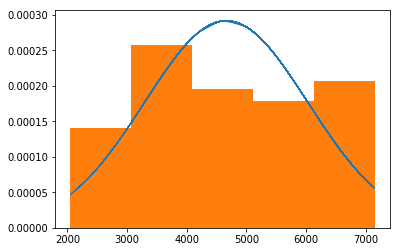

In [48]:
fit = stats.norm.pdf(df['GDDUEAFE_Price'], np.mean(df['GDDUEAFE_Price']), np.std(df['GDDUEAFE_Price']))
plt.plot(df['GDDUEAFE_Price'],fit,'-',linewidth = 1)
plt.hist(df['GDDUEAFE_Price'],normed=True,bins = 5)      
plt.show()

The distribution of GDDUEAFE Price is slightly Right Skewed but more towards normal distribution and has Thinner Tail Kurtosis which is lack of outliers.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [49]:
print("The Jarque Bera of GDDUEAFE Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['GDDUEAFE_Price'])))
print("The Jarque Bera of Daily Linear Returns of GDDUEAFE is "+ str(jarque_bera(Linear_Returns_GDDUEAFE)))
print("The Jarque Bera of Daily Compunded Returns  of GDDUEAFE is " + str(jarque_bera(Compounded_Returns_GDDUEAFE)))

The Jarque Bera of GDDUEAFE Price from Jan 1999 to 8/12/2016 is (273.98129323557635, 0.0)
The Jarque Bera of Daily Linear Returns of GDDUEAFE is (7656.203718053344, 0.0)
The Jarque Bera of Daily Compunded Returns  of GDDUEAFE is (7944.35531923837, 0.0)


## LBUSTRUU Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [50]:
Linear_Returns_LBUSTRUU = []
Compounded_Returns_LBUSTRUU = []
for i in range(len(df)-1):
    Linear_Returns_LBUSTRUU.append((df.loc[i+1,'LBUSTRUU_Price']/df.loc[i,'LBUSTRUU_Price'])-1)
    Compounded_Returns_LBUSTRUU.append(np.log(df.loc[i+1,'LBUSTRUU_Price']/df.loc[i,'LBUSTRUU_Price']))

In [51]:
Linear_Returns_LBUSTRUU

[-0.001737454034820396,
 0.0016689515407999345,
 -0.0018565903005057782,
 -0.00312391944580237,
 -0.000980779121365516,
 0.002729721640227334,
 0.003247644860482568,
 0.004320142814638439,
 -0.002215954875100734,
 -0.00023752687022726704,
 -0.0013304664948146083,
 0.002367103212836952,
 0.0025513836806381196,
 -0.00042612123149032843,
 -0.0005328786102526406,
 0.0005213146607900843,
 0.0009828766312198756,
 0.0016207455429497752,
 -0.003614201686627405,
 -0.002074442863916559,
 -0.0010334382609729076,
 -0.002651668291754894,
 -0.0010968703427719495,
 0.0007758137092250816,
 0.0013596030913081147,
 -2.38202996593051e-05,
 -0.00040495474035262546,
 -0.005016323904391995,
 0.0021435842165140606,
 0.002091200229434431,
 -0.0018602654455693868,
 -0.0005495621423364794,
 0.0020799215845654917,
 -0.002433467333086803,
 -0.003551484568381058,
 -0.004392175687027433,
 0.0026999662504219035,
 -0.0041472327739577874,
 0.0017140856801420856,
 -0.0014460444658673799,
 -0.0012671212212634897,
 0.003

In [52]:
Compounded_Returns_LBUSTRUU

[-0.0017389651586744406,
 0.0016675603888055932,
 -0.001858315900429905,
 -0.00312880906800026,
 -0.0009812603999190068,
 0.002726002716324872,
 0.003242382652024072,
 0.004310837787407436,
 -0.0022184137362601364,
 -0.00023755508420211357,
 -0.0013313523511835105,
 0.0023643060372926902,
 0.002548134426850461,
 -0.0004262120469421363,
 -0.0005330206405181079,
 0.0005211788235095671,
 0.000982393924252149,
 0.001619433552302976,
 -0.0036207486931047394,
 -0.0020765975008108254,
 -0.0010339726264800922,
 -0.002655190191437162,
 -0.0010974723452991163,
 0.0007755129213295658,
 0.0013586796679232638,
 -2.3820583367148376e-05,
 -0.00040503675666616983,
 -0.0050289478921853965,
 0.0021412900178211717,
 0.0020890167138169816,
 -0.001861997888202222,
 -0.0005497132069594247,
 0.0020777615422936536,
 -0.002436433026973808,
 -0.003557806061261761,
 -0.004401849627483247,
 0.0026963278890424344,
 -0.004155856394832299,
 0.0017126183118400186,
 -0.001447090997174885,
 -0.0012679246981649847,
 0.0

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [53]:
print("The Mean LBUSTRUU Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['LBUSTRUU_Price'])))
print("The Mean of Daily Linear Returns of LBUSTRUU is "+ str(np.mean(Linear_Returns_LBUSTRUU)))
print("The Mean of Daily Compunded Returns  of LBUSTRUU is " + str(np.mean(Compounded_Returns_LBUSTRUU)))

The Mean LBUSTRUU Price from Jan 1999 to 8/12/2016 is 1414.1396834624766
The Mean of Daily Linear Returns of LBUSTRUU is 0.00019193930276331298
The Mean of Daily Compunded Returns  of LBUSTRUU is 0.00018909322992976616


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [54]:
print("The Standard Deviation in LBUSTRUU Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['LBUSTRUU_Price'])))
print("The Standard Deviation in Linear Returns of LBUSTRUU is "+ str(np.std(Linear_Returns_LBUSTRUU)))
print("The Standard Deviation in Daily Compunded Returns  of LBUSTRUU is " + str(np.std(Compounded_Returns_LBUSTRUU)))

The Standard Deviation in LBUSTRUU Price from Jan 1999 to 8/12/2016 is 366.93370509008327
The Standard Deviation in Linear Returns of LBUSTRUU is 0.0023782349417568135
The Standard Deviation in Daily Compunded Returns  of LBUSTRUU is 0.0023782483105619446


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [55]:
print("The Skewness in LBUSTRUU Price from Jan 1999 to 8/12/2016 is " + str(skew(df['LBUSTRUU_Price'])))
print("The Skewness in Daily Linear Returns of LBUSTRUU is "+ str(skew(Linear_Returns_LBUSTRUU)))
print("The Skewness Deviation in Daily Compunded Returns  of LBUSTRUU is " + str(skew(Compounded_Returns_LBUSTRUU)))

The Skewness in LBUSTRUU Price from Jan 1999 to 8/12/2016 is 0.05926438048687105
The Skewness in Daily Linear Returns of LBUSTRUU is -0.15700295984741253
The Skewness Deviation in Daily Compunded Returns  of LBUSTRUU is -0.16934297946612198


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [56]:
print("The Kurtosis of LBUSTRUU Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['LBUSTRUU_Price'])))
print("The Kurtosis of Daily Linear Returns of LBUSTRUU is "+ str(kurtosis(Linear_Returns_LBUSTRUU)))
print("The Kurtosis of Daily Compunded Returns  of LBUSTRUU is " + str(kurtosis(Compounded_Returns_LBUSTRUU)))

The Kurtosis of LBUSTRUU Price from Jan 1999 to 8/12/2016 is -1.2819802041579618
The Kurtosis of Daily Linear Returns of LBUSTRUU is 1.4846596996054409
The Kurtosis of Daily Compunded Returns  of LBUSTRUU is 1.4872698014064527


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


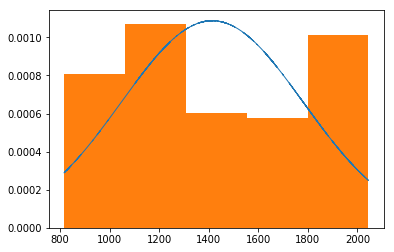

In [57]:
fit = stats.norm.pdf(df['LBUSTRUU_Price'], np.mean(df['LBUSTRUU_Price']), np.std(df['LBUSTRUU_Price']))
plt.plot(df['LBUSTRUU_Price'],fit,'-',linewidth = 1)
plt.hist(df['LBUSTRUU_Price'],normed=True,bins = 5)      
plt.show()

The distribution of LBUSTRUU is not screwed and is a normal distribution and has thinner tail Kurtosis which is lack of outliers.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [58]:
print("The Jarque Bera of LBUSTRUU Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['LBUSTRUU_Price'])))
print("The Jarque Bera of Daily Linear Returns of LBUSTRUU is "+ str(jarque_bera(Linear_Returns_LBUSTRUU)))
print("The Jarque Bera of Daily Compunded Returns  of LBUSTRUU is " + str(jarque_bera(Compounded_Returns_LBUSTRUU)))

The Jarque Bera of LBUSTRUU Price from Jan 1999 to 8/12/2016 is (311.95951162193313, 0.0)
The Jarque Bera of Daily Linear Returns of LBUSTRUU is (433.31286090922384, 0.0)
The Jarque Bera of Daily Compunded Returns  of LBUSTRUU is (437.8035524394057, 0.0)


## LF98TRUU Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [59]:
Linear_Returns_LF98TRUU = []
Compounded_Returns_LF98TRUU = []
for i in range(len(df)-1):
    Linear_Returns_LF98TRUU.append((df.loc[i+1,'LF98TRUU_Price']/df.loc[i,'LF98TRUU_Price'])-1)
    Compounded_Returns_LF98TRUU.append(np.log(df.loc[i+1,'LF98TRUU_Price']/df.loc[i,'LF98TRUU_Price']))

In [60]:
Linear_Returns_LF98TRUU

[0.0004842795410520129,
 0.0009122388948876736,
 0.0006696054907651128,
 0.0014870164872953229,
 0.0006124835279051055,
 0.0008903398130286622,
 -0.0004447739065974732,
 0.00022248590922568923,
 -0.0003336546303849275,
 0.0011496384201743481,
 7.408504963701823e-05,
 0.001074153641010378,
 7.400007400026887e-05,
 0.0014243960190905014,
 0.00016625103906897643,
 0.00217937352245845,
 0.0011610335041096764,
 0.0021721122871605214,
 -0.0006979777014491928,
 -0.00042275526146473563,
 -0.0005700415578685503,
 -5.5196776508226186e-05,
 0.0027967910502686433,
 0.0009724770642201008,
 0.0004582699393249623,
 -0.0004214152222508094,
 0.0003849326367886263,
 -0.0011360304895925433,
 0.0007154125545731915,
 -9.165398786492585e-05,
 -0.0009166238908850932,
 -0.0002568901611068597,
 0.0003487262315540196,
 -0.0008256426251764815,
 -0.0016710125234127293,
 -0.006161826107749069,
 0.0016841871483563864,
 -0.0016259261312195905,
 -0.000573702230036166,
 -0.0015739574846306281,
 -0.0003709267605112032,

In [61]:
Compounded_Returns_LF98TRUU

[0.00048416231556015006,
 0.0009118230578629235,
 0.0006693814050355915,
 0.0014859119730968842,
 0.0006122960364221851,
 0.0008899436956392821,
 -0.00044487284785021415,
 0.00022246116290619079,
 -0.0003337103054756284,
 0.0011489780919697714,
 7.408230547526177e-05,
 0.0010735771507772534,
 7.399733612986043e-05,
 0.0014233825293738954,
 0.00016623722089648314,
 0.00217700213278748,
 0.0011603600259475794,
 0.0021697566617716745,
 -0.0006982214012896875,
 -0.0004228446476634953,
 -0.0005702040933283117,
 -5.519829990635267e-05,
 0.002792887307121267,
 0.0009720045147374248,
 0.0004581649657259233,
 -0.0004215040425999564,
 0.00038485856922793185,
 -0.00113667626135312,
 0.0007151567689991081,
 -9.165818834833428e-05,
 -0.0009170442474559784,
 -0.00025692316303633144,
 0.00034866544069423367,
 -0.0008259836557745888,
 -0.0016724102221044564,
 -0.006180888504698662,
 0.0016827704955636206,
 -0.0016272493836466612,
 -0.0005738668601293192,
 -0.0015751974569923278,
 -0.000370995570858293

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [62]:
print("The Mean LF98TRUU Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['LF98TRUU_Price'])))
print("The Mean of Daily Linear Returns of LF98TRUU is "+ str(np.mean(Linear_Returns_LF98TRUU)))
print("The Mean of Daily Compunded Returns  of LF98TRUU is " + str(np.mean(Compounded_Returns_LF98TRUU)))

The Mean LF98TRUU Price from Jan 1999 to 8/12/2016 is 994.2877551472212
The Mean of Daily Linear Returns of LF98TRUU is 0.0002727573850866519
The Mean of Daily Compunded Returns  of LF98TRUU is 0.00026800031531132014


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [63]:
print("The Standard Deviation in LF98TRUU Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['LF98TRUU_Price'])))
print("The Standard Deviation in Linear Returns of LF98TRUU is "+ str(np.std(Linear_Returns_LF98TRUU)))
print("The Standard Deviation in Daily Compunded Returns  of LF98TRUU is " + str(np.std(Compounded_Returns_LF98TRUU)))

The Standard Deviation in LF98TRUU Price from Jan 1999 to 8/12/2016 is 408.781615832792
The Standard Deviation in Linear Returns of LF98TRUU is 0.0030663954320288064
The Standard Deviation in Daily Compunded Returns  of LF98TRUU is 0.0030759266528797686


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [64]:
print("The Skewness in LF98TRUU Price from Jan 1999 to 8/12/2016 is " + str(skew(df['LF98TRUU_Price'])))
print("The Skewness in Daily Linear Returns of LF98TRUU is "+ str(skew(Linear_Returns_LF98TRUU)))
print("The Skewness Deviation in Daily Compunded Returns  of LF98TRUU is " + str(skew(Compounded_Returns_LF98TRUU)))

The Skewness in LF98TRUU Price from Jan 1999 to 8/12/2016 is 0.4881919471795948
The Skewness in Daily Linear Returns of LF98TRUU is -2.1093334360983054
The Skewness Deviation in Daily Compunded Returns  of LF98TRUU is -2.249151727706741


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [65]:
print("The Kurtosis of LF98TRUU Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['LF98TRUU_Price'])))
print("The Kurtosis of Daily Linear Returns of LF98TRUU is "+ str(kurtosis(Linear_Returns_LF98TRUU)))
print("The Kurtosis of Daily Compunded Returns  of LF98TRUU is " + str(kurtosis(Compounded_Returns_LF98TRUU)))

The Kurtosis of LF98TRUU Price from Jan 1999 to 8/12/2016 is -1.2112739033018227
The Kurtosis of Daily Linear Returns of LF98TRUU is 32.24692722191411
The Kurtosis of Daily Compunded Returns  of LF98TRUU is 33.7379409006937


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


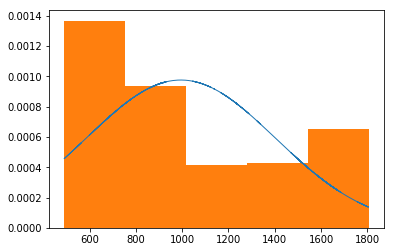

In [66]:
fit = stats.norm.pdf(df['LF98TRUU_Price'], np.mean(df['LF98TRUU_Price']), np.std(df['LF98TRUU_Price']))
plt.plot(df['LF98TRUU_Price'],fit,'-',linewidth = 1)
plt.hist(df['LF98TRUU_Price'],normed=True,bins = 5)      
plt.show()

The distribution of LF98TRUU Price is slightly right skewed and has thinner tail kurtosis which is lack of outliers.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [67]:
print("The Jarque Bera of LF98TRUU Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['LF98TRUU_Price'])))
print("The Jarque Bera of Daily Linear Returns of LF98TRUU is "+ str(jarque_bera(Linear_Returns_LF98TRUU)))
print("The Jarque Bera of Daily Compunded Returns  of LF98TRUU is " + str(jarque_bera(Compounded_Returns_LF98TRUU)))

The Jarque Bera of LF98TRUU Price from Jan 1999 to 8/12/2016 is (455.5601487730815, 0.0)
The Jarque Bera of Daily Linear Returns of LF98TRUU is (199016.63241249663, 0.0)
The Jarque Bera of Daily Compunded Returns  of LF98TRUU is (217987.95792182154, 0.0)


## GDLEEGF Assest

### 1. Calculating daily Linear Returns and Compounded Returns

In [68]:
Linear_Returns_GDLEEGF = []
Compounded_Returns_GDLEEGF = []
for i in range(len(df)-1):
    Linear_Returns_GDLEEGF.append((df.loc[i+1,'GDLEEGF_Price']/df.loc[i,'GDLEEGF_Price'])-1)
    Compounded_Returns_GDLEEGF.append(np.log(df.loc[i+1,'GDLEEGF_Price']/df.loc[i,'GDLEEGF_Price']))

In [69]:
Linear_Returns_GDLEEGF

[0.0036174402250350735,
 0.022740887912593655,
 0.012809240039384218,
 -0.0034929196628478154,
 -0.008739797686206252,
 -0.019921039479128932,
 -0.03729696709574004,
 -0.012158300065883698,
 0.03776564465812626,
 0.01846896905743378,
 0.017223577241423982,
 -0.01058494881521821,
 -0.019833117795571287,
 -0.008108343275360141,
 0.014731994895994083,
 0.019350646630815538,
 0.006295239286879806,
 0.00598818565601178,
 0.01053964609241187,
 -0.009729719694327899,
 -0.0016816517258243513,
 -0.005154142078384605,
 -0.004653126119324891,
 0.008774306468976256,
 -0.010864488633407499,
 0.003921986776570741,
 0.01305710414200889,
 0.010252529443472103,
 0.003312419981020831,
 -0.004287024214381319,
 -0.00405218402470553,
 0.0016179968679592704,
 0.008130442921677972,
 -0.010083130940002571,
 0.008363026229299964,
 -0.0002772096111860467,
 0.0049073730294542095,
 0.010141539624125784,
 -0.0002833363637043673,
 0.008905240949905968,
 0.000277628167987487,
 0.008140422846484752,
 0.01992375391750

In [70]:
Compounded_Returns_GDLEEGF

[0.003610913024579783,
 0.022486168389093508,
 0.012727895627793277,
 -0.0034990341491585118,
 -0.00877821371399623,
 -0.020122138603192962,
 -0.038010291788449356,
 -0.012232816810052134,
 0.0370699833932674,
 0.018300488923024587,
 0.01707693286722826,
 -0.010641367867626919,
 -0.020032433851166178,
 -0.008141394673328105,
 0.014624533190436368,
 0.01916580361683611,
 0.006275507037562409,
 0.005970327727883561,
 0.010484491225904963,
 -0.009777362704292037,
 -0.0016830672893002735,
 -0.0051674704860628215,
 -0.0046639856108167555,
 0.008736035943920972,
 -0.010923938174739847,
 0.0039143158367743475,
 0.01297259499265846,
 0.010200328753041426,
 0.003306946002701422,
 -0.004296239850556654,
 -0.004060416369233313,
 0.001616689321241232,
 0.0080975689371227,
 -0.010134310025700793,
 0.008328249881258168,
 -0.00027724804087253004,
 0.004895371123632859,
 0.010090459276430668,
 -0.0002833765110355109,
 0.008865823135629395,
 0.0002775896364191245,
 0.008107468326114824,
 0.019727873440

### 2. Calculating Summer Statistics: 
#####        a. Calculating Mean of Price, Linear Returns and Compunded returns

In [71]:
print("The Mean GDLEEGF Price from Jan 1999 to 8/12/2016 is " + str(np.mean(df['GDLEEGF_Price'])))
print("The Mean of Daily Linear Returns of GDLEEGF is "+ str(np.mean(Linear_Returns_GDLEEGF)))
print("The Mean of Daily Compunded Returns  of GDLEEGF is " + str(np.mean(Compounded_Returns_GDLEEGF)))

The Mean GDLEEGF Price from Jan 1999 to 8/12/2016 is 59438.35126367037
The Mean of Daily Linear Returns of GDLEEGF is 0.0004593094895935566
The Mean of Daily Compunded Returns  of GDLEEGF is 0.0004067707349070288


#####        b. Calculating Standard Deviation of Price, Linear Returns and Compunded returns

In [72]:
print("The Standard Deviation in GDLEEGF Price from Jan 1999 to 8/12/2016 is " + str(np.std(df['GDLEEGF_Price'])))
print("The Standard Deviation in Linear Returns of GDLEEGF is "+ str(np.std(Linear_Returns_GDLEEGF)))
print("The Standard Deviation in Daily Compunded Returns  of GDLEEGF is " + str(np.std(Compounded_Returns_GDLEEGF)))

The Standard Deviation in GDLEEGF Price from Jan 1999 to 8/12/2016 is 28647.937576047545
The Standard Deviation in Linear Returns of GDLEEGF is 0.010231238465466239
The Standard Deviation in Daily Compunded Returns  of GDLEEGF is 0.010248152309992502


#####        c. Calculating Skewness of Price, Linear Returns and Compunded returns

In [73]:
print("The Skewness in GDLEEGF Price from Jan 1999 to 8/12/2016 is " + str(skew(df['GDLEEGF_Price'])))
print("The Skewness in Daily Linear Returns of GDLEEGF is "+ str(skew(Linear_Returns_GDLEEGF)))
print("The Skewness Deviation in Daily Compunded Returns  of GDLEEGF is " + str(skew(Compounded_Returns_GDLEEGF)))

The Skewness in GDLEEGF Price from Jan 1999 to 8/12/2016 is -0.06476767216416777
The Skewness in Daily Linear Returns of GDLEEGF is -0.32124127770432503
The Skewness Deviation in Daily Compunded Returns  of GDLEEGF is -0.458666459003513


#####        d. Calculating Kurtosis of Price, Linear Returns and Compunded returns

In [74]:
print("The Kurtosis of GDLEEGF Price from Jan 1999 to 8/12/2016 is " + str(kurtosis(df['GDLEEGF_Price'])))
print("The Kurtosis of Daily Linear Returns of GDLEEGF is "+ str(kurtosis(Linear_Returns_GDLEEGF)))
print("The Kurtosis of Daily Compunded Returns  of GDLEEGF is " + str(kurtosis(Compounded_Returns_GDLEEGF)))

The Kurtosis of GDLEEGF Price from Jan 1999 to 8/12/2016 is -1.5382497863125013
The Kurtosis of Daily Linear Returns of GDLEEGF is 7.105658478176659
The Kurtosis of Daily Compunded Returns  of GDLEEGF is 7.121747068387579


### 3. Performing the Normaity Test:
#### a. Checking the Skewness and Kurtosis using graphical representation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


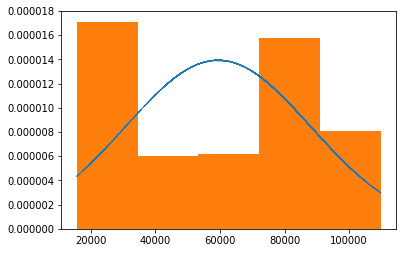

In [75]:
fit = stats.norm.pdf(df['GDLEEGF_Price'], np.mean(df['GDLEEGF_Price']), np.std(df['GDLEEGF_Price']))
plt.plot(df['GDLEEGF_Price'],fit,'-',linewidth = 1)
plt.hist(df['GDLEEGF_Price'],normed=True,bins = 5)      
plt.show()

The distribution of GDLEEGF Price is slightly left skewed but more towards a normal distribution and has thinner tail kurtosis which is lack of outliers.

#### b. Calculating the Jarque Bera of Price, Linear Returns and Compounded returns

In [76]:
print("The Jarque Bera of GDLEEGF Price from Jan 1999 to 8/12/2016 is " + str(jarque_bera(df['GDLEEGF_Price'])))
print("The Jarque Bera of Daily Linear Returns of GDLEEGF is "+ str(jarque_bera(Linear_Returns_GDLEEGF)))
print("The Jarque Bera of Daily Compunded Returns  of GDLEEGF is " + str(jarque_bera(Compounded_Returns_GDLEEGF)))

The Jarque Bera of GDLEEGF Price from Jan 1999 to 8/12/2016 is (448.4989170050867, 0.0)
The Jarque Bera of Daily Linear Returns of GDLEEGF is (9578.279114628203, 0.0)
The Jarque Bera of Daily Compunded Returns  of GDLEEGF is (9702.020289344806, 0.0)
